In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
fpn_csv = '/Users/AGAlonso86/Desktop/Mlearning/data/cluster_images.csv'
data = pd.read_csv(fpn_csv, encoding='ISO-8859-1')

In [14]:
# get column names
list(data)

['s_no',
 'artist',
 'title',
 'art_movement',
 'museum_venue',
 'country_of_origin',
 'has_text',
 'primary_medium',
 'medium',
 'work_size',
 'date',
 'representation',
 'representation_semi',
 'kinetic',
 'map',
 'map2',
 'spatial_dimension',
 'spatial_dimension2',
 'pl',
 'si',
 'va',
 'te',
 'co',
 'or',
 'sh',
 'reflection',
 'po',
 'li',
 'ar',
 'notes']

In [15]:
data.isnull().sum()

s_no                     0
artist                   0
title                    1
art_movement           169
museum_venue             0
country_of_origin        1
has_text                 0
primary_medium           0
medium                   0
work_size                9
date                     0
representation           0
representation_semi      0
kinetic                  0
map                      0
map2                     0
spatial_dimension        0
spatial_dimension2       0
pl                       0
si                       0
va                       0
te                       0
co                       0
or                       0
sh                       0
reflection               0
po                       0
li                       0
ar                       0
notes                    0
dtype: int64

In [16]:
data.head()

,s_no,artist,title,art_movement,museum_venue,country_of_origin,has_text,primary_medium,medium,work_size,...,va,te,co,or,sh,reflection,po,li,ar,notes
0,2,Giorgio de Chirico,The Uncertainty of the Poet,surrealism,Tate,Italy,False,painting,"painting, oil on canvas",106 x 94 cm,...,3,0,0,4,3,False,0,0,5,"distorted perspective, shadow, signification o..."
1,3,Giovanni Anselmo,Direction,arte povera,Tate,Italy,False,sculpture,"sculpture, fabric, glass & metal",24 x 420 x 335 cm,...,1,3,0,3,2,False,0,0,5,"hard to understand the viewpoint, sense of for..."
2,4,Milton Avery,Yellow Sky,modernism,Tate,America,False,painting,"painting, oil on canvas",156 x 184 cm,...,2,4,4,2,4,False,0,0,5,"flatish, textured shapes & specific colors-lin..."
3,5,Gillian Avery,Distillation,abstraction,Tate,UK,False,painting,"painting, oil, household paint on hardboard",213 x 152 cm,...,1,2,0,2,4,False,0,0,5,"shapes, layers, paint handlng/texture, orienta..."
4,6,Joseph (Jef) Banc,Pair-Bearing Matrix,abstraction,Tate,France,False,painting,"painting, mixed media on canvas",73 x 60 cm,...,1,4,1,0,4,False,0,0,5,"ambiguity through abstraction, odd shape, v te..."


In [17]:
data ['primary_medium'] = pd.Categorical(data ['primary_medium']).codes

In [18]:
data.describe()

,s_no,primary_medium,pl,si,va,te,co,or,sh,po,li,ar
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,203.500000,2.470297,2.975248,0.992574,1.972772,1.982673,0.418317,1.680693,2.915842,0.844059,3.071782,4.037129
std,116.769003,1.535877,1.385634,1.326367,1.608523,1.594717,0.885931,1.669913,1.359772,1.656011,2.188918,1.829211
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,102.750000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,5.000000
50%,203.500000,2.000000,3.000000,0.000000,2.000000,2.000000,0.000000,1.000000,3.000000,0.000000,4.000000,5.000000
75%,304.250000,4.000000,4.000000,2.000000,4.000000,3.000000,0.000000,3.000000,4.000000,0.000000,5.000000,5.000000
max,405.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [19]:
X = data[['primary_medium', 'kinetic', 'po', 'li']]

In [20]:
X.head()

,primary_medium,kinetic,po,li
0,2,False,0,0
1,5,False,0,0
2,2,False,0,0
3,2,False,0,0
4,2,False,0,0


In [21]:
from sklearn.cluster import KMeans

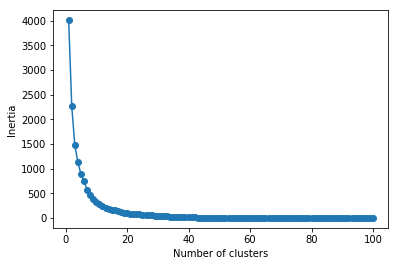

In [22]:
# first attempt at fitting K means to view change in Inertia

# container to store inertia scores over iterations
distortions = []

# fit KMeans iteratively to begin to assess the appropriate number of clusters
for i in range(1, 101):
    km = KMeans(n_clusters=i)
    km.fit(X)
    distortions.append(km.inertia_)
    
# vizualize change in inertia
plt.plot(range(1, 101), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [23]:
range_n_clusters = [8,10,20,25]

For n_clusters = 8 The average silhouette_score is : 0.56536387237


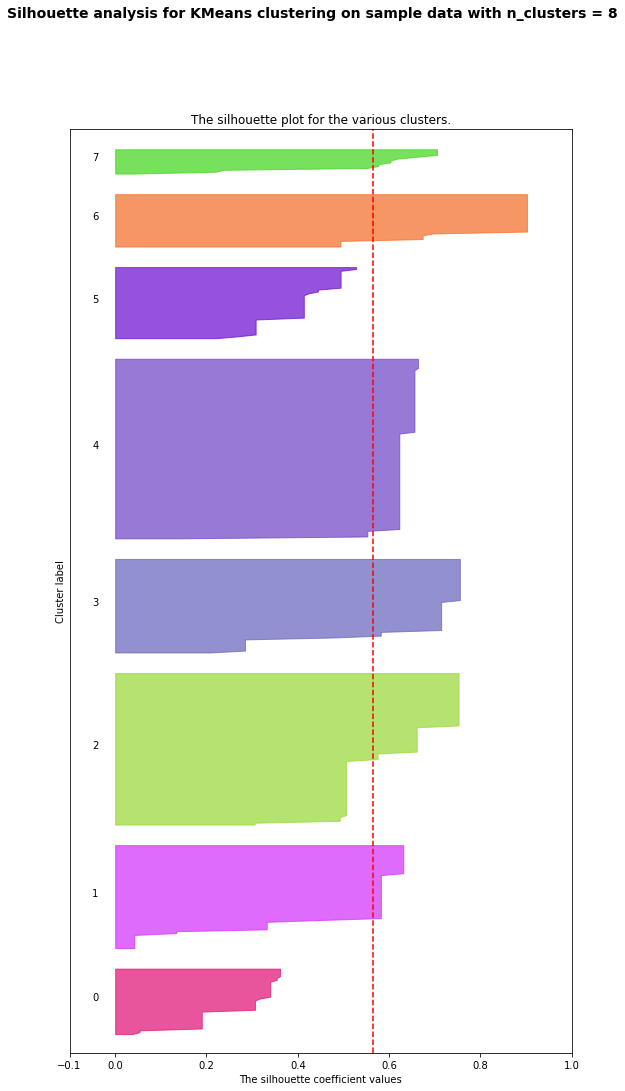

For n_clusters = 10 The average silhouette_score is : 0.629084383666


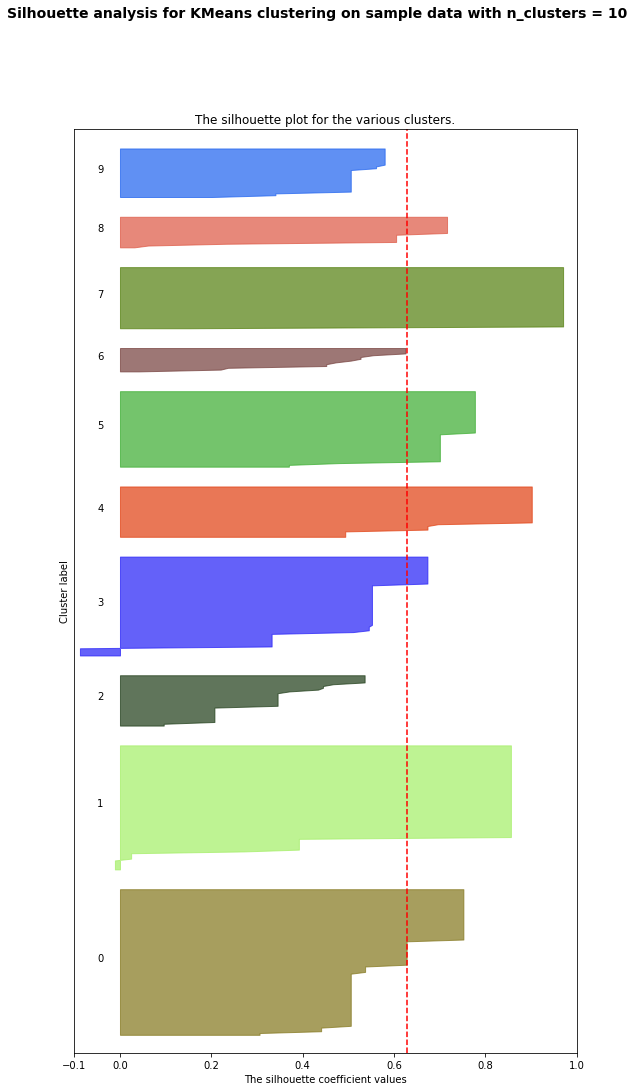

For n_clusters = 20 The average silhouette_score is : 0.770599655629


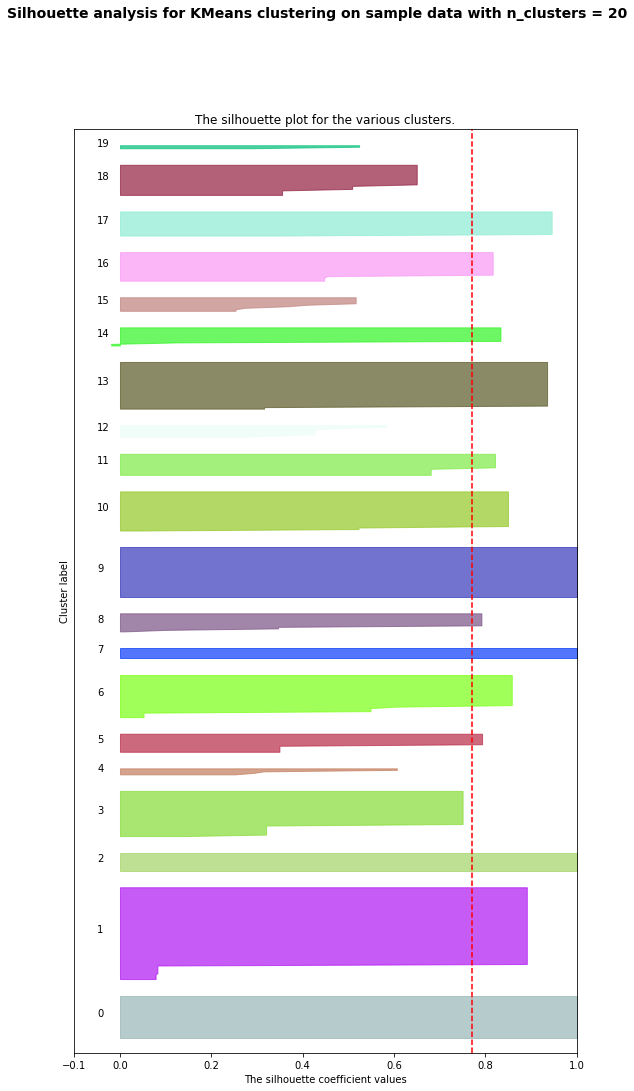

For n_clusters = 25 The average silhouette_score is : 0.813825883207


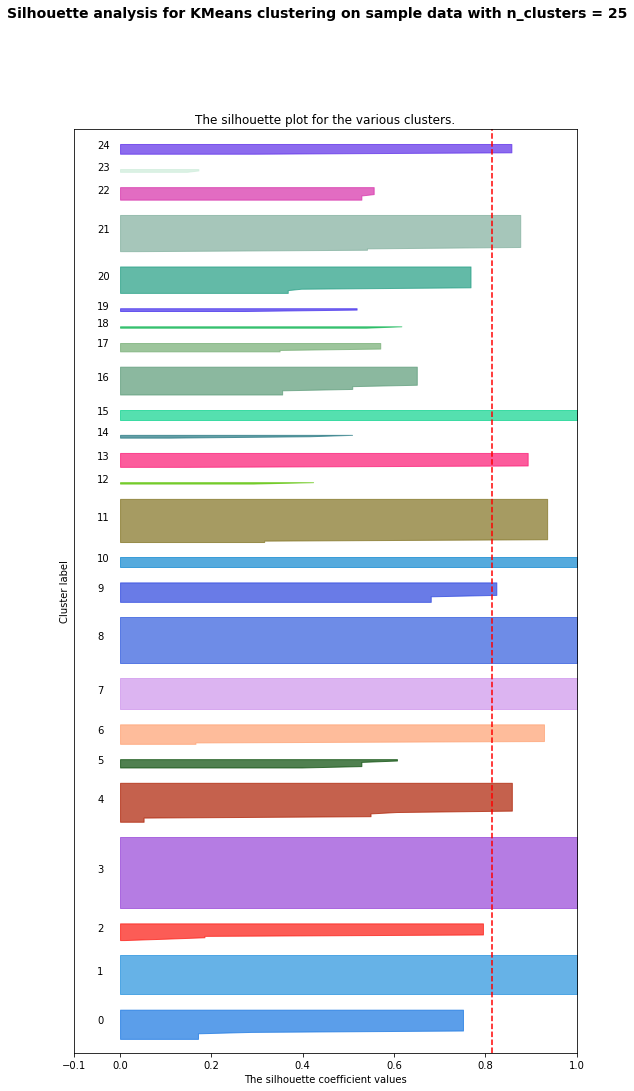

In [25]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import random

for n_clusters in range_n_clusters:
    # Create a subplot
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(9, 17)

    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # select a random color for this cluster
        r = lambda: random.randint(0,255)
        color = '#%02X%02X%02X' % (r(),r(),r())
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [26]:
my_n_clusters = 25

In [27]:
km = KMeans(n_clusters=my_n_clusters)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=25, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [28]:
for i in range(0, max(km.labels_)+1):
    print('<p class="cluster"> ')
    print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * ")
    print("Images in cluster: " + str(i))
    print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * ")
    print("</p>")
    for j in range(0, len(km.labels_)):
        if km.labels_[j] == i:
            print('<img class="picture" src="images/' + (str(j+2) + '_small.jpg' + '">'))

<p class="cluster"> 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 0
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
</p>
<img class="picture" src="images/11_small.jpg">
<img class="picture" src="images/19_small.jpg">
<img class="picture" src="images/25_small.jpg">
<img class="picture" src="images/98_small.jpg">
<img class="picture" src="images/107_small.jpg">
<img class="picture" src="images/112_small.jpg">
<img class="picture" src="images/119_small.jpg">
<img class="picture" src="images/142_small.jpg">
<img class="picture" src="images/162_small.jpg">
<img class="picture" src="images/166_small.jpg">
<img class="picture" src="images/167_small.jpg">
<img class="picture" src="images/168_small.jpg">
<img class="picture" src="images/199_small.jpg">
<img class="picture" src="images/208_small.jpg">
<img class="picture" src="images/209_small.jpg">
<img class="picture" src="images/223_small.jpg">
<img class="picture" src="images/254_small.jpg">
<i

</p>
<img class="picture" src="images/263_small.jpg">
<img class="picture" src="images/278_small.jpg">
<img class="picture" src="images/294_small.jpg">
<img class="picture" src="images/305_small.jpg">
<p class="cluster"> 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 20
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
</p>
<img class="picture" src="images/212_small.jpg">
<img class="picture" src="images/277_small.jpg">
<p class="cluster"> 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 21
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
</p>
<img class="picture" src="images/131_small.jpg">
<img class="picture" src="images/150_small.jpg">
<img class="picture" src="images/344_small.jpg">
<p class="cluster"> 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 22
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
</p>
<img class="picture" src="images/44_small.jp